In [1]:
from nb_setup import *

autoreload 3 enabled
ROOT_DIR: /home/jp/projects/kaggle-HuBMAP
Host name: doomfist


## TIF images

In [14]:
import numpy as np

from kaggle_hubmap.data_utils.core import get_paths, make_concurrent
from kaggle_hubmap.data_utils.image import get_image_meta

In [3]:
trn_src = '/hdd-pool/hubmap-hacking-the-human-vasculature/train/'
tst_src = '/hdd-pool/hubmap-hacking-the-human-vasculature/test/'

In [5]:
trn_paths = get_paths(trn_src, '.tif')
tst_paths = get_paths(tst_src, '.tif')

INFO:kaggle_hubmap.data_utils.core:Found 7033 paths in "/hdd-pool/hubmap-hacking-the-human-vasculature/train/" matching keyword ".tif"
INFO:kaggle_hubmap.data_utils.core:Found 1 paths in "/hdd-pool/hubmap-hacking-the-human-vasculature/test/" matching keyword ".tif"


In [9]:
get_image_meta(trn_paths[100])

{'img_id': '033a656390b2',
 'img_name': '033a656390b2.tif',
 'img_ext': '.tif',
 'img_dir': PosixPath('/hdd-pool/hubmap-hacking-the-human-vasculature/train'),
 'img_shape': (512, 512, 3),
 'img_size': 628002,
 'img_mean': 138.84621938069662,
 'img_std': 53.414468031613204,
 'dtype': 'uint8'}

In [10]:
meta_res = make_concurrent(get_image_meta, trn_paths, progress=True)

In [11]:
df_trn = pd.DataFrame(meta_res)

In [13]:
df_trn.head()

,img_id,img_name,img_ext,img_dir,img_shape,img_size,img_mean,img_std,dtype
0,004daf1cbe75,004daf1cbe75.tif,.tif,/hdd-pool/hubmap-hacking-the-human-vasculature...,"(512, 512, 3)",678186,127.844147,53.891510,uint8
1,004fb033dd09,004fb033dd09.tif,.tif,/hdd-pool/hubmap-hacking-the-human-vasculature...,"(512, 512, 3)",668266,131.642422,52.182117,uint8
2,00168d1b7522,00168d1b7522.tif,.tif,/hdd-pool/hubmap-hacking-the-human-vasculature...,"(512, 512, 3)",476242,179.740737,46.071931,uint8
3,0006ff2aa7cd,0006ff2aa7cd.tif,.tif,/hdd-pool/hubmap-hacking-the-human-vasculature...,"(512, 512, 3)",593386,139.910844,50.723449,uint8
4,0033bbc76b6b,0033bbc76b6b.tif,.tif,/hdd-pool/hubmap-hacking-the-human-vasculature...,"(512, 512, 3)",631674,157.959923,45.679587,uint8


In [16]:
np.unique(df_trn['dtype']), np.unique(df_trn['img_shape'])

(array(['uint8'], dtype=object), array([(512, 512, 3)], dtype=object))

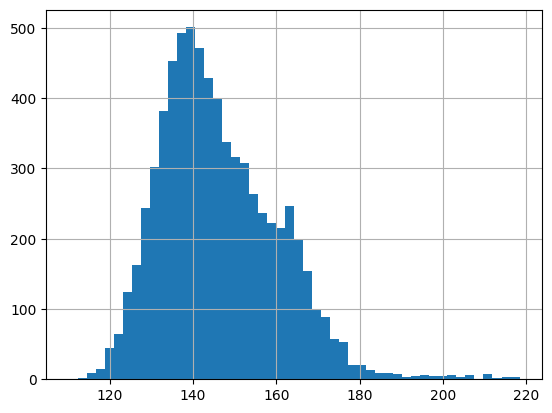

In [22]:
df_trn['img_mean'].hist(bins=50).figure.savefig('../docs/trn_img_mean.png')

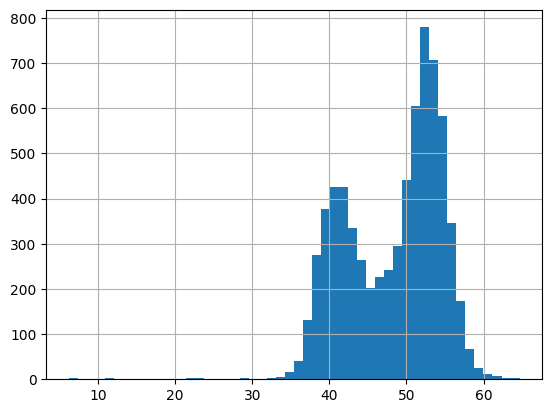

In [23]:
df_trn['img_std'].hist(bins=50).figure.savefig('../docs/trn_img_std.png')

In [25]:
df_trn.to_csv('../metadata/trn_img_meta_7033.csv', index=False)

## provided csvs

In [26]:
df_tile = pd.read_csv('/hdd-pool/hubmap-hacking-the-human-vasculature/tile_meta.csv')
df_wsi = pd.read_csv('/hdd-pool/hubmap-hacking-the-human-vasculature/wsi_meta.csv')

In [28]:
df_tile.shape, df_wsi.shape

((7033, 5), (4, 7))

In [29]:
df_tile.head()

,id,source_wsi,dataset,i,j
0,0006ff2aa7cd,2,2,16896,16420
1,000e79e206b7,6,3,10240,29184
2,00168d1b7522,2,2,14848,14884
3,00176a88fdb0,7,3,14848,25088
4,0033bbc76b6b,1,1,10240,43008


In [33]:
df_tile['dataset'].value_counts()

dataset
3    5400
2    1211
1     422
Name: count, dtype: int64

In [34]:
df_tile['source_wsi'].value_counts()

source_wsi
6     600
7     600
8     600
9     600
10    600
11    600
12    600
13    600
14    600
1     507
2     445
3     410
4     271
Name: count, dtype: int64

In [31]:
df_wsi

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


In [32]:
df_tile.to_csv('../metadata/tile_meta_7033.csv', index=False)
df_wsi.to_csv('../metadata/wsi_meta.csv', index=False)

## polygons

In [47]:
from kaggle_hubmap.data_utils.annotations import read_json_file

In [37]:
polygons_path = '/hdd-pool/hubmap-hacking-the-human-vasculature/polygons.jsonl'

In [48]:
json_data = read_json_file(polygons_path)

In [45]:
type(json_data)

list

In [52]:
json_data[0]

{'id': '0006ff2aa7cd',
 'annotations': [{'type': 'glomerulus',
   'coordinates': [[[167, 249],
     [166, 249],
     [165, 249],
     [164, 249],
     [163, 249],
     [162, 249],
     [161, 249],
     [160, 249],
     [159, 249],
     [158, 249],
     [157, 249],
     [156, 249],
     [155, 249],
     [154, 249],
     [153, 249],
     [152, 249],
     [151, 249],
     [150, 249],
     [149, 249],
     [148, 249],
     [147, 249],
     [146, 249],
     [145, 249],
     [144, 249],
     [143, 249],
     [142, 249],
     [141, 249],
     [140, 249],
     [139, 249],
     [138, 249],
     [137, 249],
     [136, 249],
     [135, 249],
     [134, 249],
     [133, 249],
     [132, 249],
     [131, 249],
     [130, 249],
     [129, 249],
     [128, 249],
     [127, 249],
     [126, 249],
     [125, 249],
     [124, 249],
     [123, 249],
     [122, 249],
     [122, 248],
     [121, 248],
     [120, 248],
     [119, 248],
     [118, 248],
     [117, 248],
     [117, 247],
     [116, 247],
    

In [74]:
pd.DataFrame(json_data).head()['annotations']

0    [{'type': 'glomerulus', 'coordinates': [[[167,...
1    [{'type': 'glomerulus', 'coordinates': [[[511,...
2    [{'type': 'blood_vessel', 'coordinates': [[[16...
3    [{'type': 'blood_vessel', 'coordinates': [[[40...
4    [{'type': 'blood_vessel', 'coordinates': [[[14...
Name: annotations, dtype: object

In [69]:
def get_annotations_types(json_data):
    keys = set()
    for json_obj in json_data:
        for anno in json_obj['annotations']:
            keys.add(anno['type'])
        
    return keys

In [70]:
get_annotations_types(json_data)

{'blood_vessel', 'glomerulus', 'unsure'}

In [67]:
len(json_data[0]['annotations'])

9

In [68]:
json_data[0]['annotations'][0]

{'type': 'glomerulus',
 'coordinates': [[[167, 249],
   [166, 249],
   [165, 249],
   [164, 249],
   [163, 249],
   [162, 249],
   [161, 249],
   [160, 249],
   [159, 249],
   [158, 249],
   [157, 249],
   [156, 249],
   [155, 249],
   [154, 249],
   [153, 249],
   [152, 249],
   [151, 249],
   [150, 249],
   [149, 249],
   [148, 249],
   [147, 249],
   [146, 249],
   [145, 249],
   [144, 249],
   [143, 249],
   [142, 249],
   [141, 249],
   [140, 249],
   [139, 249],
   [138, 249],
   [137, 249],
   [136, 249],
   [135, 249],
   [134, 249],
   [133, 249],
   [132, 249],
   [131, 249],
   [130, 249],
   [129, 249],
   [128, 249],
   [127, 249],
   [126, 249],
   [125, 249],
   [124, 249],
   [123, 249],
   [122, 249],
   [122, 248],
   [121, 248],
   [120, 248],
   [119, 248],
   [118, 248],
   [117, 248],
   [117, 247],
   [116, 247],
   [115, 247],
   [115, 246],
   [114, 246],
   [113, 246],
   [112, 246],
   [111, 246],
   [110, 246],
   [110, 245],
   [109, 245],
   [108, 245],
  

In [ ]:
def convert_point_annotations_to_mask_array(
    series_path: os.PathLike, 
    dst_img_sorted_sop_iuids: t.List[str],
    df_anno_meta: pd.DataFrame,
    dst_mask_label: int = 1
    ) -> np.ndarray:
    """
    Create a segmentation mask from point annotations generated with MD.ai.
    MD.ai produces annotations at the slice level and keeps track of the slices
    using the "SOPInstanceUID". The "SOPInstanceUID" is therefore used to match
    the annotations to its corresponding image slice (generated from a dicom
    series).
    
    Args:
        series_path: path to saved image array generated from the dicom series
        dst_img_sorted_sop_iuids: "SOPInstanceUID"s of the sorted slices that
            produced the image array
        df_anno_meta: dataframe of annotations containing the following:
            - `data` -> list of dictionaries with "foreground" and
                "background" keys
            - `height` -> list of heights (rows) for each slice array annotated.
                For a given volume, they are expected to be equal (i.e. 512)
            - `width` -> list of widths (cols) for each slice array annotated.
                For a given volume, they are expected to be equal (i.e. 512)
            - `SOPInstanceUID` -> list of "SOPInstanceUID"s of the
                slices annotated
        dst_mask_label: label to use in the segmentation mask for the given
            annotations
            
    Returns:
        segmentation mask of the annotations with same shape as
        corresponding image array. Data type is "uint8".
        `SimpleITK.Image` of image array, used to save the mask to disk
    """
    # meta checks
    anno_data, h, w, anno_sop_iuids = df_anno_meta.values.T
    
    if not all(i == h[0] for i in h):
        raise ValueError('Annotation array heights are not equal')
    if not all(i == w[0] for i in w):
        raise ValueError('Annotation array widths are not equal')
    if not all(i in dst_img_sorted_sop_iuids for i in anno_sop_iuids):
        raise ValueError(
            'Some annotation "SOPInstanceUID"s are not in the target image')
        
    anno_xy_shape = (int(h[0]), int(w[0]))
    ct_path = os.path.join(series_path, 'CT.nrrd')
    img = load_image(ct_path, as_array=False)
    dst_img_arr = sitk.GetArrayFromImage(img)
    
    # check compatibility with image array
    if not anno_xy_shape == dst_img_arr.shape[1:]:
        raise ValueError(
            f'Annotations xy-shape ({anno_xy_shape}) does not match image array\
                xy-shape ({dst_img_arr.shape[1:]})')
    
    slices = []
    
    for sop_iuid in dst_img_sorted_sop_iuids:
        slice_mask = np.zeros(dst_img_arr.shape[1:], dtype='uint8')

        if sop_iuid in df_anno_meta['SOPInstanceUID'].tolist():
            anno_data, h, w, _ = df_anno_meta.query(
                'SOPInstanceUID == @sop_iuid').values.tolist()[0]
            if isinstance(anno_data, str):
                anno_data = ast.literal_eval(anno_data)
                if anno_data['foreground']:
                    for i in anno_data['foreground']:
                        slice_mask = cv2.fillPoly(
                            slice_mask, [np.array(i, dtype=np.int32)], dst_mask_label)
                if anno_data['background']:
                    for i in anno_data['background']:
                        slice_mask = cv2.fillPoly(
                            slice_mask, [np.array(i, dtype=np.int32)], 0)
                    
        slices.append(slice_mask)
        
    return np.vstack([np.expand_dims(s, 0) for s in slices]), img